In [1]:
%matplotlib inline
import numpy as np

In [2]:
DOWNLOAD_URL = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt'
DOWNLOAD_PATH = './irish-lyrics-eof.txt'

In [3]:
# import urllib.request

# urllib.request.urlretrieve(DOWNLOAD_URL, DOWNLOAD_PATH)

In [4]:
with open(DOWNLOAD_PATH, 'r') as f:
    lines = f.read()

corpus = lines.lower().split('\n')

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
index_word = tokenizer.index_word

vocab_size = len(word_index) + 1  # Add one for OOV
print("vocab_size = {}".format(vocab_size))

vocab_size = 2690


In [6]:
sequences = []
for line in corpus:
    seq = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(seq)):
        n_gram_seq = seq[:i+1]
        sequences.append(n_gram_seq)

In [7]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[51, 12, 96, 1217, 48, 2, 69]

In [8]:
sequences[:6]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69]]

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(map(len, sequences))
print("max_len = {}".format(max_len))
input_sequences = np.array(pad_sequences(sequences, maxlen=max_len, padding='pre'))

max_len = 16


In [10]:
input_sequences[0:6]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   51,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   51,   12,   96],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   51,   12,   96, 1217],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          51,   12,   96, 1217,   48],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   51,
          12,   96, 1217,   48,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   51,   12,
          96, 1217,   48,    2,   69]])

In [11]:
from tensorflow.keras.utils import to_categorical

xs, label = input_sequences[:, :-1], input_sequences[:, -1]
ys = to_categorical(label)

print("xs.shape = {}, label.shape = {}".format(xs.shape, label.shape))
print("ys.shape = {}".format(ys.shape))

xs.shape = (12038, 15), label.shape = (12038,)
ys.shape = (12038, 2690)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len-1), # One word is reserved for label
    Bidirectional(LSTM(20)),
    Dense(vocab_size, activation='softmax')
])

optimizer = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
history = model.fit(xs, ys, epochs=100, verbose=1)

W0815 21:59:28.264061  8580 deprecation.py:323] From d:\Dev\Miniconda3\envs\tf2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 12038 samples
Epoch 1/100
12038/12038 [==============================] - 6s 538us/sample - loss: 6.7129 - accuracy: 0.0673
Epoch 2/100
12038/12038 [==============================] - 4s 312us/sample - loss: 6.0169 - accuracy: 0.0942
Epoch 3/100
12038/12038 [==============================] - 4s 313us/sample - loss: 5.5401 - accuracy: 0.1190
Epoch 4/100
12038/12038 [==============================] - 4s 313us/sample - loss: 5.1046 - accuracy: 0.1489
Epoch 5/100
12038/12038 [==============================] - 4s 311us/sample - loss: 4.7042 - accuracy: 0.1744
Epoch 6/100
12038/12038 [==============================] - 4s 310us/sample - loss: 4.3486 - accuracy: 0.2088
Epoch 7/100
12038/12038 [==============================] - 4s 313us/sample - loss: 4.0572 - accuracy: 0.2391
Epoch 8/100
12038/12038 [==============================] - 4s 318us/sample - loss: 3.8154 - accuracy: 0.2682
Epoch 9/100
12038/12038 [==============================] - 4s 315us/sample - loss: 3.6077 - accuracy: 0.2

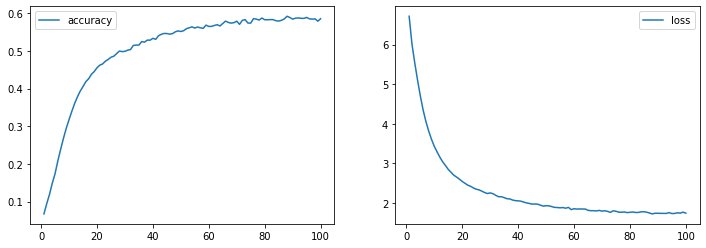

In [14]:
from util import plot_history

plot_history(history, include_val=False)

In [15]:
text = "All through the night"
len_predict = 50

for _ in range(len_predict):
    seq = tokenizer.texts_to_sequences([text])[0]
    seq = pad_sequences([seq], maxlen=max_len-1, padding='pre')
    predicted = model.predict_classes(seq)
    word = index_word[predicted[0]]
    text += " " + word

print(text)

All through the night and cross he said dead a rollin in the town of the wintry weather speak of innocent jollity swings where narrow floor gone drinkin up the moon over the old pianos setting there though underfoot tis trod his hit off day by night as town their color cant run from
